# Explore KLCI Index During Pre-Covid and Covid Preriod #

In [2]:
import pandas as pd
#!pip install pandas_datareader to validate crypto pricing with specific date
import pandas_datareader as web
import datetime as dt
from datetime import date
import datetime

import seaborn as sns
from numerize import numerize
import matplotlib.patches as patches
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
start = dt.datetime(2019,7,1)
end = dt.datetime(2021,6,30)

In [4]:
KLCI_Hist = web.DataReader('^KLSE;1=9','yahoo', start, end)
KLCI_Hist = KLCI_Hist.reset_index()

In [5]:
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}

In [18]:
def get_charts(data, covid_data, title):
    plt.rc('figure', figsize=(15, 10))
    
    fig, axes = plt.subplots(2, 1, 
                gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    fig.suptitle(title, fontsize=16)
    
    date = data['Date']
    close = data['Close']
    vol = data['Volume']
    
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], 
    linewidth=2, label='Index')
    plot_price.set_ylabel('KLCI Index', fontsize=14)
    plot_price.set_xlabel('Date', fontsize=14)
    
    
    covid_number = plot_price.twinx()
    covid_number.plot(covid_data['Day'], covid_data['Daily new confirmed cases of COVID-19'], color=colors['red'], 
    linewidth=2, label='Covid Confirmed Case Numbers', linestyle = '--')
    covid_number.set_ylabel('Cases Number', fontsize=14)
    
    
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')
    plot_vol.set_ylabel('Volume (in millions)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.legend()

In [7]:
def get_max_row(data):
    column = data["Adj Close"]
    max_value = column.max()
    index = column.idxmax()
    return max_value, index

In [8]:
def get_min_row(data):
    column = data["Adj Close"]
    min_value = column.min()
    index = column.idxmin()
    return min_value, index

In [9]:
Covid = pd.read_csv(r"Data/Covid-Cases/daily-covid-cases-deaths.csv", sep=",")
Covid['Day'] = Covid['Day'].apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [10]:
Covid_GroupBy = Covid.groupby('Day')['Daily new confirmed cases of COVID-19'].sum()
Covid_GroupBy = Covid_GroupBy.reset_index()
Covid_GroupBy_FilterBy_Date = Covid_GroupBy[(Covid_GroupBy['Day'] >= start) & (Covid_GroupBy['Day'] <= end)]

In [11]:
Covid_Malaysia = Covid[Covid['Entity']=="Malaysia"]

In [12]:
Covid_Malaysia_GroupBy = Covid_Malaysia.groupby('Day')['Daily new confirmed cases of COVID-19'].sum()
Covid_Malaysia_GroupBy = Covid_Malaysia_GroupBy.reset_index()
Covid_Malaysia_GroupBy_FilterBy_Date = Covid_Malaysia_GroupBy[(Covid_Malaysia_GroupBy['Day'] >= start) & (Covid_Malaysia_GroupBy['Day'] <= end)]

In [13]:
KLSE_Hist_max_price, index = get_max_row(KLCI_Hist)
KLSE_Hist_min_price, index = get_min_row(KLCI_Hist)

KLSE_percentage_change = (KLSE_Hist_max_price/KLSE_Hist_min_price)*100

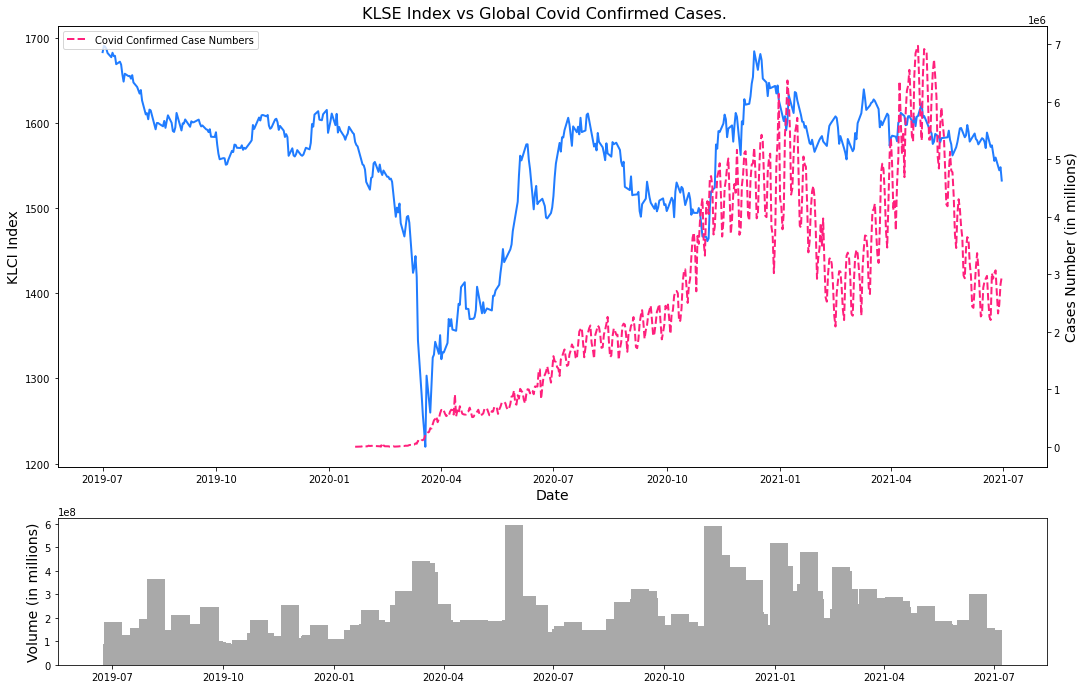

In [17]:
get_charts(KLCI_Hist, Covid_GroupBy_FilterBy_Date,\
           'KLSE Index vs Global Covid Confirmed Cases.')

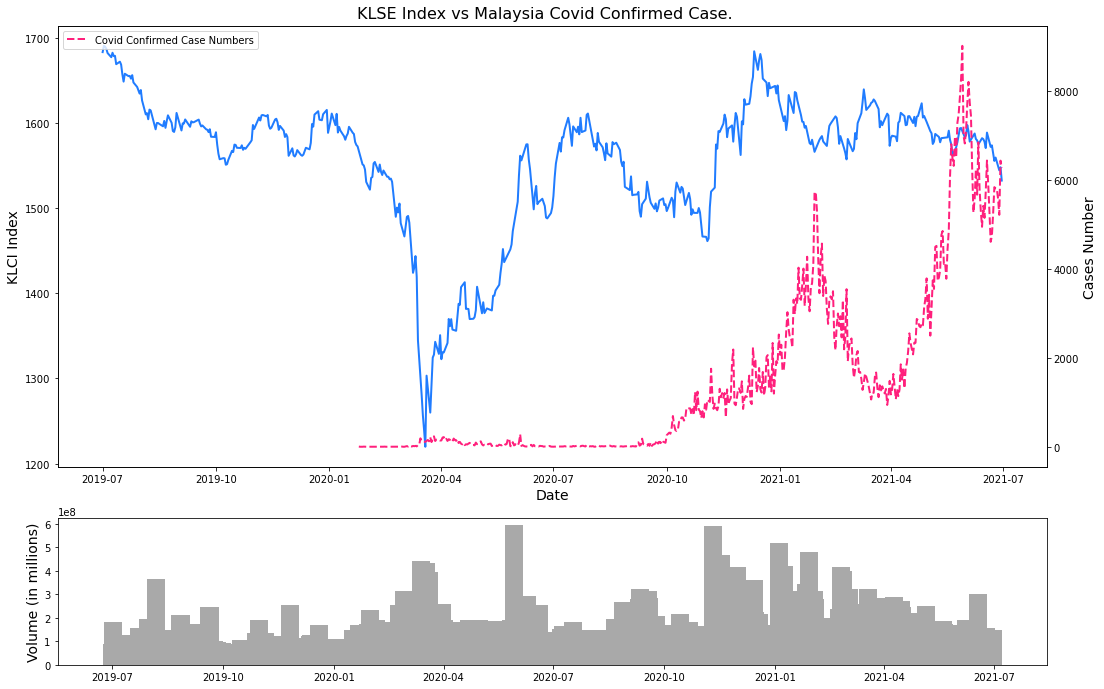

In [19]:
get_charts(KLCI_Hist,Covid_Malaysia_GroupBy_FilterBy_Date,\
           'KLSE Index vs Malaysia Covid Confirmed Case.')